In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
data=pd.read_csv('mnist_784_csv.csv')
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [3]:
x=data.drop(['class'], axis=1)
y=data['class'].values

In [4]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int64)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [6]:
x_train.shape

(49000, 784)

In [7]:
x_test.shape

(21000, 784)

In [8]:
x_train = x_train/255
x_test=x_test/255

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [10]:
model.compile(optimizer='sgd', 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.6963 - accuracy: 0.8121
Epoch 2/10
1532/1532 [==============================] - 3s 2ms/step - loss: 0.2763 - accuracy: 0.9214
Epoch 3/10
1532/1532 [==============================] - 3s 2ms/step - loss: 0.2156 - accuracy: 0.9376
Epoch 4/10
1532/1532 [==============================] - 3s 2ms/step - loss: 0.1791 - accuracy: 0.9485
Epoch 5/10
1532/1532 [==============================] - 3s 2ms/step - loss: 0.1522 - accuracy: 0.9557
Epoch 6/10
1532/1532 [==============================] - 3s 2ms/step - loss: 0.1322 - accuracy: 0.9624
Epoch 7/10
1532/1532 [==============================] - 3s 2ms/step - loss: 0.1166 - accuracy: 0.9668
Epoch 8/10
1532/1532 [==============================] - 3s 2ms/step - loss: 0.1036 - accuracy: 0.9701
Epoch 9/10
1532/1532 [==============================] - 3s 2ms/step - loss: 0.0932 - accuracy: 0.9735
Epoch 10/10
1532/1532 [==============================] - 3s 2ms/step - loss: 0.083

In [12]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)

657/657 [==============================] - 1s 1ms/step - loss: 0.1109 - accuracy: 0.9657


In [13]:
x_test_img = x_test.to_numpy().reshape(x_test.shape[0],28,28)

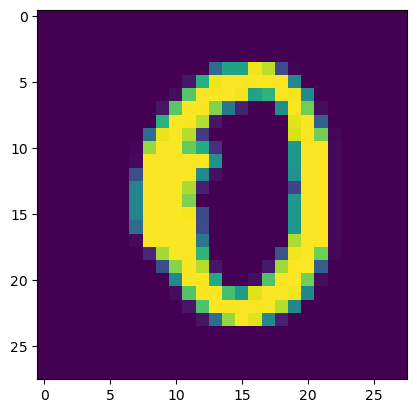

In [14]:
plt.imshow(x_test_img[0])

657/657 [==============================] - 1s 2ms/step
8


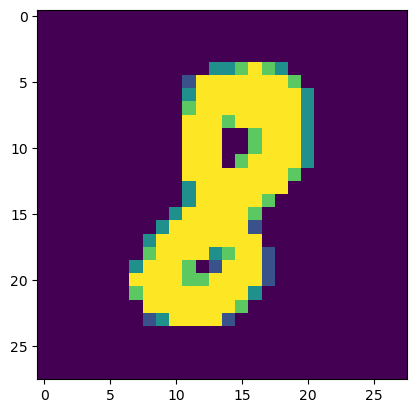

In [15]:
n=random.randint(0,500)
plt.imshow(x_test_img[n])
predicted_value = model.predict(x_test)
print(np.argmax(predicted_value[n]))

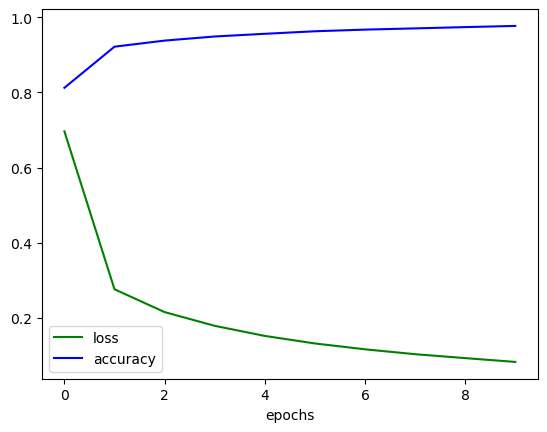

In [16]:
plt.plot(history.history['loss'],label='loss',color='g')
plt.plot(history.history['accuracy'],label='accuracy',color='b')
plt.xlabel('epochs')
plt.legend()
plt.show()